In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score


%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [2]:
def load_features(files):
    df = pd.read_csv('../dataset/train.csv', index_col=0, usecols=['id', 'target'])
    for file in files:
        df = df.merge(pd.read_csv(file, index_col=0), how='outer', left_index=True, right_index=True)
    return df

In [3]:
full_model = load_features(['../features/features_basicas_texto.csv', '../features/features_basicas_keyword.csv', '../features/links_and_hashtags.csv', '../features/features_location.csv'])

model = full_model[full_model['target'].notnull()]
labels = model['target']
model = model.drop('target', axis=1)

model

,word_count,unique_words_count,word_count_above_mean,unique_words_count_above_mean,char_count,char_count_above_mean,avg_word_length,subjectivity,polarity,neg,neu,pos,has_keyword,keyword_count,keyword_mean,encoded_keyword,has_insecure_link,has_secure_link,has_link,has_www,insecure_link_count,secure_link_count,link_count,has_hashtagh,hashtag_count,has_user_mentions,user_mentions_count,has_location,match_score,encoded_country,encoded_city
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,7,0,0,38,0,5.428571,0.000000,0.2732,0,0,1,0,87,0.391892,0.660000,0,0,0,0,0,0,0,1,1,0,0,0,0.0,0.422934,0.422934
4,7,7,0,0,31,0,4.428571,0.400000,-0.3400,1,0,0,0,87,0.391892,0.702128,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.420188,0.420188
5,11,9,1,0,78,1,7.090909,0.400000,0.0000,0,1,0,0,87,0.391892,0.702128,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.420188,0.420188
6,8,8,0,0,53,1,6.625000,0.000000,0.0000,0,1,0,0,87,0.391892,0.702128,0,0,0,0,0,0,0,1,1,0,0,0,0.0,0.420188,0.420188
7,10,10,1,1,47,0,4.700000,0.000000,0.0000,0,1,0,0,87,0.391892,0.652174,0,0,0,0,0,0,0,1,2,0,0,0,0.0,0.414843,0.414843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10869,9,9,0,0,46,0,5.111111,1.000000,-0.4939,1,0,0,0,87,0.391892,0.652174,0,1,1,0,1,0,1,0,0,0,0,0,0.0,0.414843,0.414843
10870,9,9,0,0,56,1,6.222222,0.400000,-0.5423,1,0,0,0,87,0.391892,0.652174,0,0,0,0,0,0,0,0,0,1,2,0,0.0,0.414843,0.414843
10871,6,6,0,0,27,0,4.500000,0.000000,0.0000,0,1,0,0,87,0.391892,0.652174,0,1,1,0,1,0,1,0,0,0,0,0,0.0,0.414843,0.414843


In [4]:
full_model

,target,word_count,unique_words_count,word_count_above_mean,unique_words_count_above_mean,char_count,char_count_above_mean,avg_word_length,subjectivity,polarity,neg,neu,pos,has_keyword,keyword_count,keyword_mean,encoded_keyword,has_insecure_link,has_secure_link,has_link,has_www,insecure_link_count,secure_link_count,link_count,has_hashtagh,hashtag_count,has_user_mentions,user_mentions_count,has_location,match_score,encoded_country,encoded_city
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,4,4,0,0,24,0,6.000000,1.000000,-0.7003,1,0,0,0,87,0.391892,0.688525,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.421769,0.421769
1,1.0,7,7,0,0,38,0,5.428571,0.000000,0.2732,0,0,1,0,87,0.391892,0.660000,0,0,0,0,0,0,0,1,1,0,0,0,0.0,0.422934,0.422934
2,NaN,7,7,0,0,46,0,6.571429,0.550000,0.4404,0,0,1,0,87,0.391892,0.688525,0,0,0,0,0,0,0,1,1,0,0,0,0.0,0.421769,0.421769
3,NaN,10,10,1,1,52,1,5.200000,0.000000,-0.6159,1,0,0,0,87,0.391892,0.688525,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.421769,0.421769
4,1.0,7,7,0,0,31,0,4.428571,0.400000,-0.3400,1,0,0,0,87,0.391892,0.702128,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.420188,0.420188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,1.0,6,6,0,0,27,0,4.500000,0.000000,0.0000,0,1,0,0,87,0.391892,0.652174,0,1,1,0,1,0,1,0,0,0,0,0,0.0,0.414843,0.414843
10872,1.0,14,13,1,1,100,1,7.142857,0.583333,-0.7845,1,0,0,0,87,0.391892,0.652174,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.414843,0.414843
10873,1.0,10,9,1,0,49,0,4.900000,0.900000,0.0000,0,1,0,0,87,0.391892,0.666667,0,1,1,0,1,0,1,0,0,0,0,0,0.0,0.424917,0.424917


# Feature Importance

In [5]:
def feature_importance(model, classifier):
    importances = classifier.feature_importances_
    std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
    indexes = np.argsort(importances)[::-1]
    print("Feature ranking:")
    for f in range(model.shape[1]):
        print(f"{f + 1}. feature {indexes[f]}: {model.columns[f]} ({importances[indexes[f]]})")
    print()
    plt.figure(figsize=(24,12))
    plt.title("Features por importancia")
    plt.bar(range(model.shape[1]), importances[indexes], color="r", yerr=std[indexes], align="center")
    plt.xticks(range(model.shape[1]), indexes)
    plt.xlim([-1, model.shape[1]])
    plt.show()

## Con Random Forest

In [6]:
forest = ExtraTreesClassifier(n_estimators=500,
                              random_state=0,
                              class_weight ={1:1})
forest.fit(model, labels.values.ravel())

ExtraTreesClassifier(class_weight={1: 1}, n_estimators=500, random_state=0)

Feature ranking:
1. feature 15: word_count (0.21561456114445846)
2. feature 4: unique_words_count (0.07549930888322609)
3. feature 6: word_count_above_mean (0.0698015384286056)
4. feature 8: unique_words_count_above_mean (0.06876614732513588)
5. feature 30: char_count (0.06480182243501652)
6. feature 29: char_count_above_mean (0.06362457584924909)
7. feature 7: avg_word_length (0.05559664945964094)
8. feature 1: subjectivity (0.05111907105227868)
9. feature 0: polarity (0.04963004443555883)
10. feature 28: neg (0.03941617967938977)
11. feature 17: neu (0.028712460467859982)
12. feature 18: pos (0.0207245900797766)
13. feature 24: has_keyword (0.020705989236407547)
14. feature 26: keyword_count (0.018919997609175964)
15. feature 11: keyword_mean (0.016117150318795483)
16. feature 23: encoded_keyword (0.015148543664433098)
17. feature 5: has_insecure_link (0.01506463108468047)
18. feature 25: has_secure_link (0.014947443286453319)
19. feature 22: has_link (0.014299703688885857)
20. featu

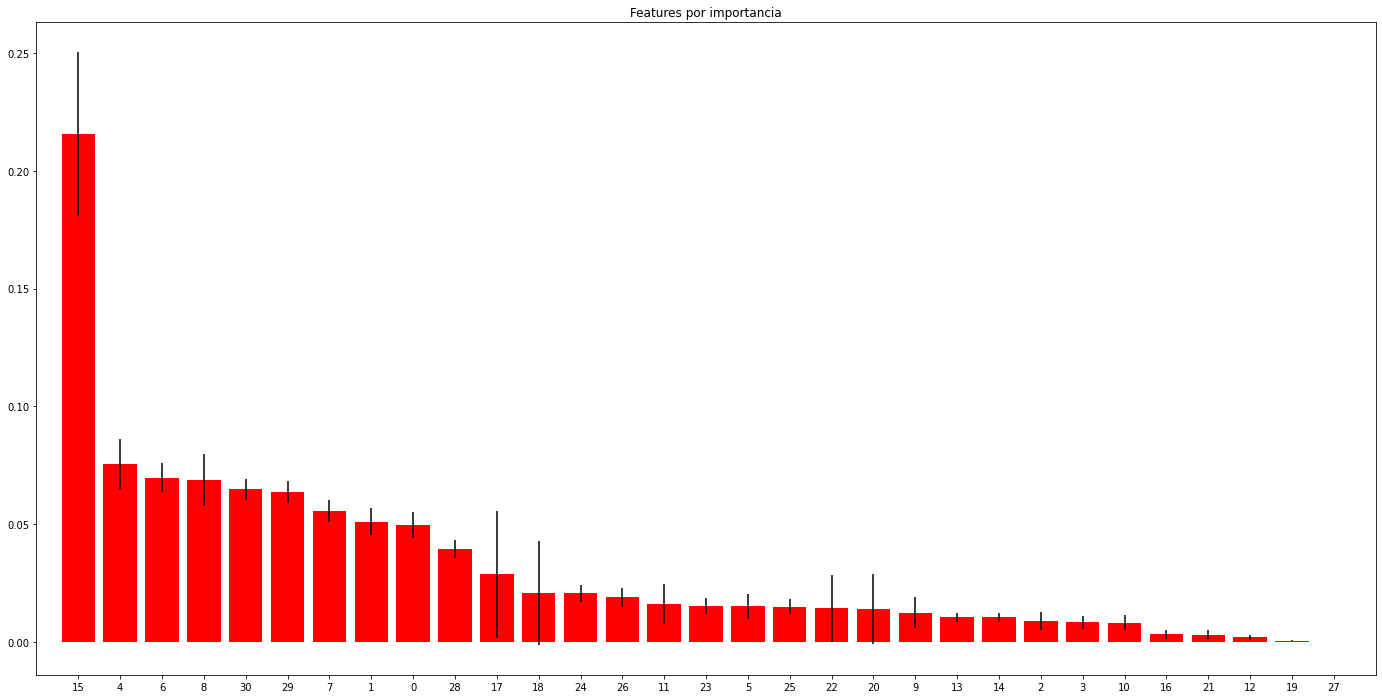

In [7]:
feature_importance(model, forest)

# Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(model, labels,test_size=0.2)
len(X_train),len(X_test),len(y_train),len(y_test)

(6090, 1523, 6090, 1523)

# Probando clasificadores

In [9]:
def try_classifier(classifier):
    classifier.fit(X_train, y_train.values.ravel())
    predictions = classifier.predict(X_test)
    predictions_with_prob = classifier.predict_proba(X_test)[:,1]
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    print(f'Verdaderos Negativos: {tn}')
    print(f'Falsos Negativos: {fn}')
    print(f'Verdaderos Positivos: {tp}')
    print(f'Falsos Positivos: {fp}')
    print()
    print(f'accuracy score: {accuracy_score(y_test, predictions)}')
    print(f'roc auc score: {roc_auc_score(y_test,  predictions_with_prob)}')
    print(f'f1 score: {f1_score(y_test,  predictions)}')
    print()
    fig, axs = plt.subplots(3)
    fig.set_size_inches(10,20)
    plt.subplots_adjust(hspace=0.2)
    xgb.plot_importance(xgb_classifier, ax=axs[0], importance_type='weight', title='Feature Importance (weight)', xlabel='weight', show_values=False)
    xgb.plot_importance(xgb_classifier, ax=axs[1], importance_type='gain', title='Feature Importance (gain)', xlabel='gain', show_values=False)
    xgb.plot_importance(xgb_classifier, ax=axs[2], importance_type='cover', title='Feature Importance (cover)', xlabel='cover', show_values=False)
    plt.show()
    return classifier

## XGBoost

In [10]:
# grid search para encontrar hiperparametros

#xgb_classifier = GridSearchCV(
#    xgb.XGBClassifier(),
#    {
#        'max_depth': [1,2,3,4,5,6,7,8,9,10],
#        'n_estimators' :[100,200,500,1000],
#        'learning_rate': [0.0001, 0.001, 0.01, 0.1],
#        'scale_pos_weight': [0.8, 1, 1.2]
#    },
#    scoring="f1",
#    n_jobs=-1,
#    refit=True
#)
#xgb_classifier.best_params_

Verdaderos Negativos: 696
Falsos Negativos: 219
Verdaderos Positivos: 441
Falsos Positivos: 167

accuracy score: 0.7465528562048588
roc auc score: 0.8179290003160224
f1 score: 0.695583596214511



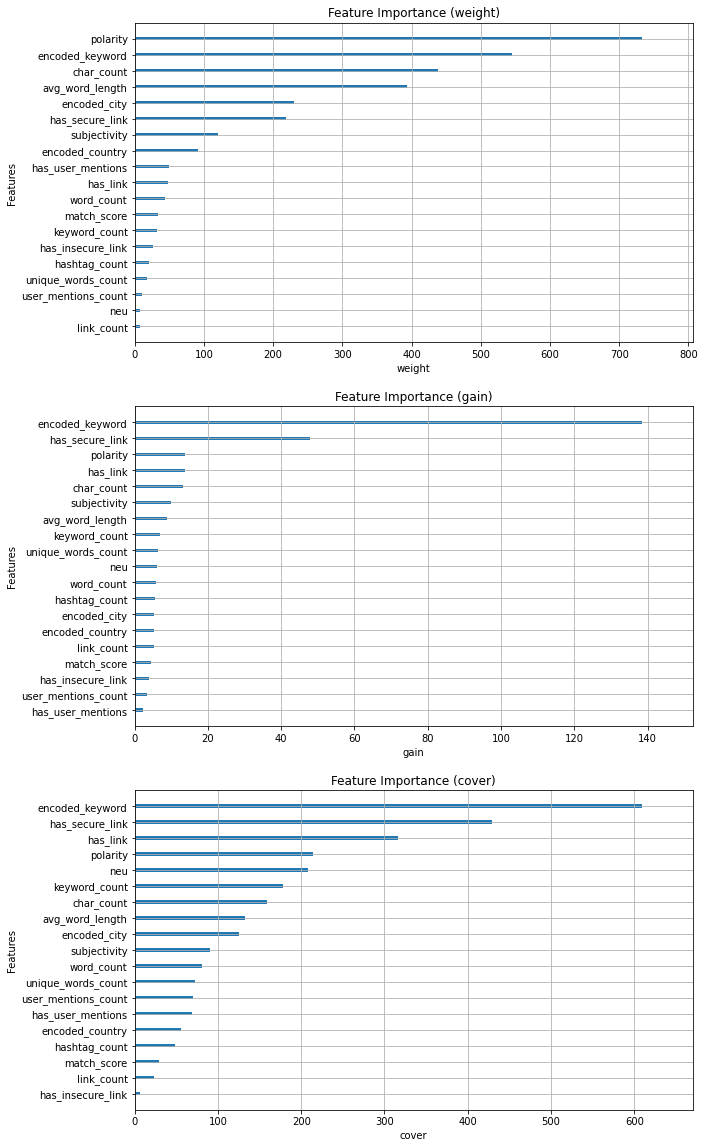

In [11]:
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=5,
    learning_rate=0.01,
    n_estimators=100,
    scale_pos_weight=1.2
)

xgb_classifier = try_classifier(xgb_classifier)


## LightGBM

Verdaderos Negativos: 731
Falsos Negativos: 240
Verdaderos Positivos: 420
Falsos Positivos: 132

accuracy score: 0.7557452396585687
roc auc score: 0.8208083148986972
f1 score: 0.693069306930693



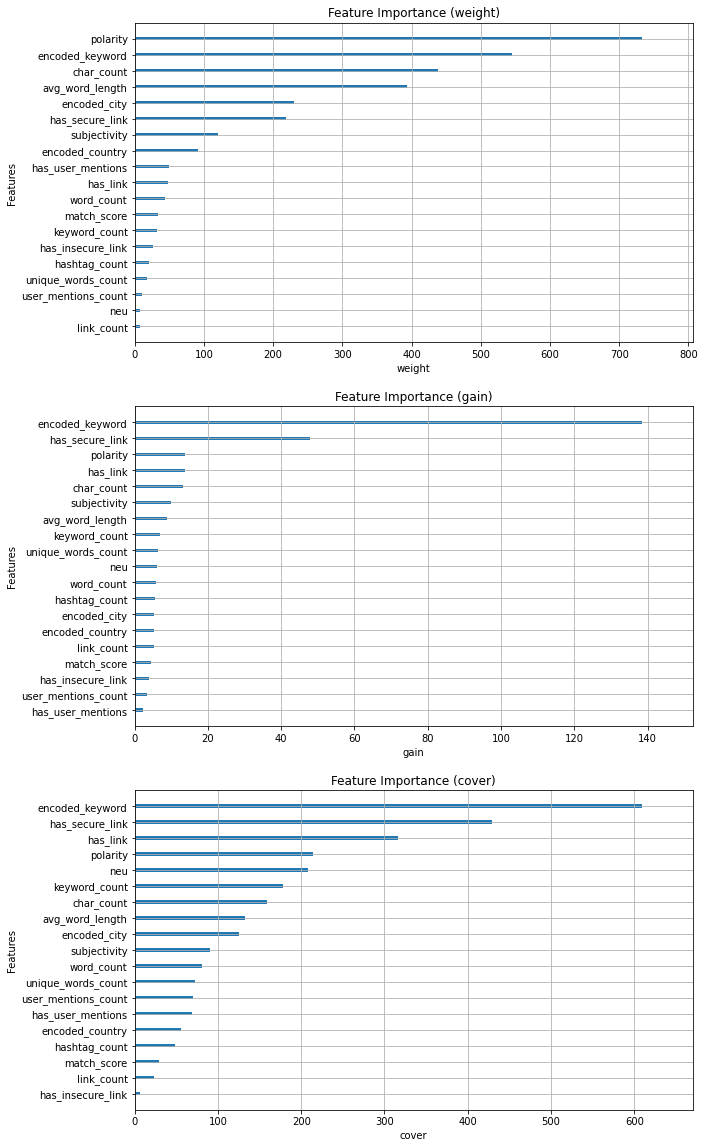

In [12]:
lgbm_classifier = lgb.LGBMClassifier(   
    objective='binary',
    boosting='goss',
    scale_pos_weight=1.2,
    n_estimators=100,
    learning_rate=0.01,
    max_depth=5, 
    num_threads=8,        
)

lgbm_classifier = try_classifier(lgbm_classifier)

## Random Forest

Verdaderos Negativos: 706
Falsos Negativos: 236
Verdaderos Positivos: 424
Falsos Positivos: 157

accuracy score: 0.7419566644780039
roc auc score: 0.8125908564205203
f1 score: 0.6833199033037872



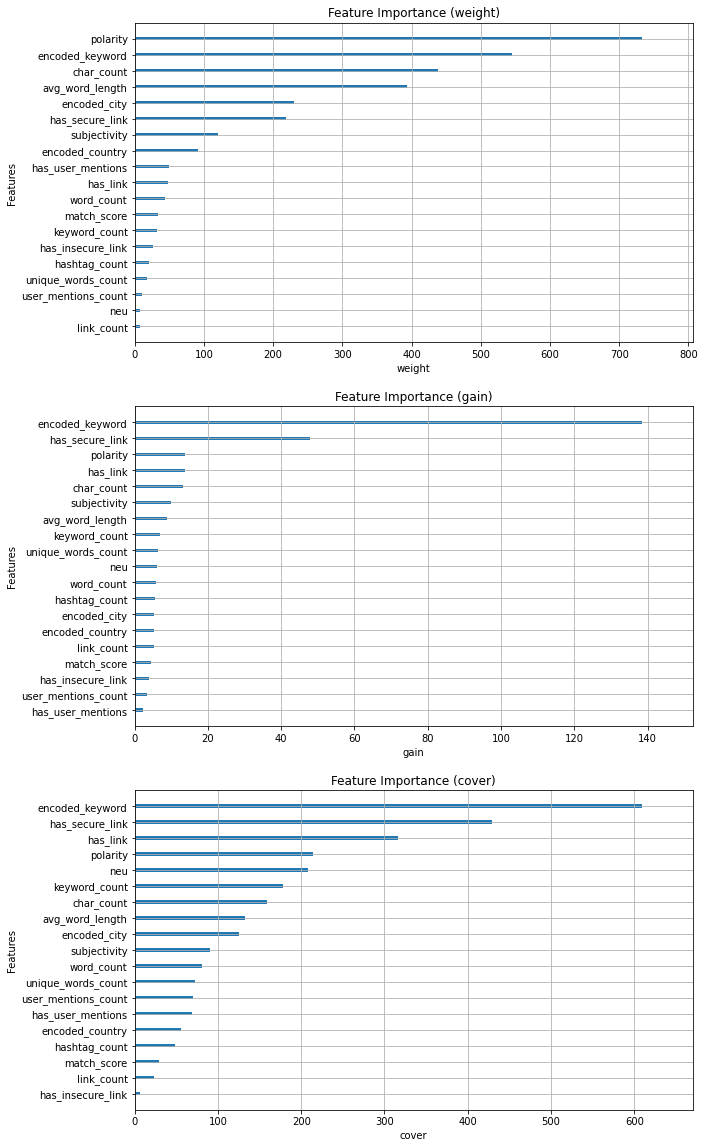

In [13]:
rf_classifier = RandomForestClassifier(
    criterion= 'entropy',
    max_depth= 5,
    n_estimators=100,
    max_features= 'auto',
    class_weight={1:1.2},
    n_jobs=-1
)
rf_classifier = try_classifier(rf_classifier)

## Catboost

Verdaderos Negativos: 691
Falsos Negativos: 209
Verdaderos Positivos: 451
Falsos Positivos: 172

accuracy score: 0.7498358502954695
roc auc score: 0.8150654868499596
f1 score: 0.7030397505845675



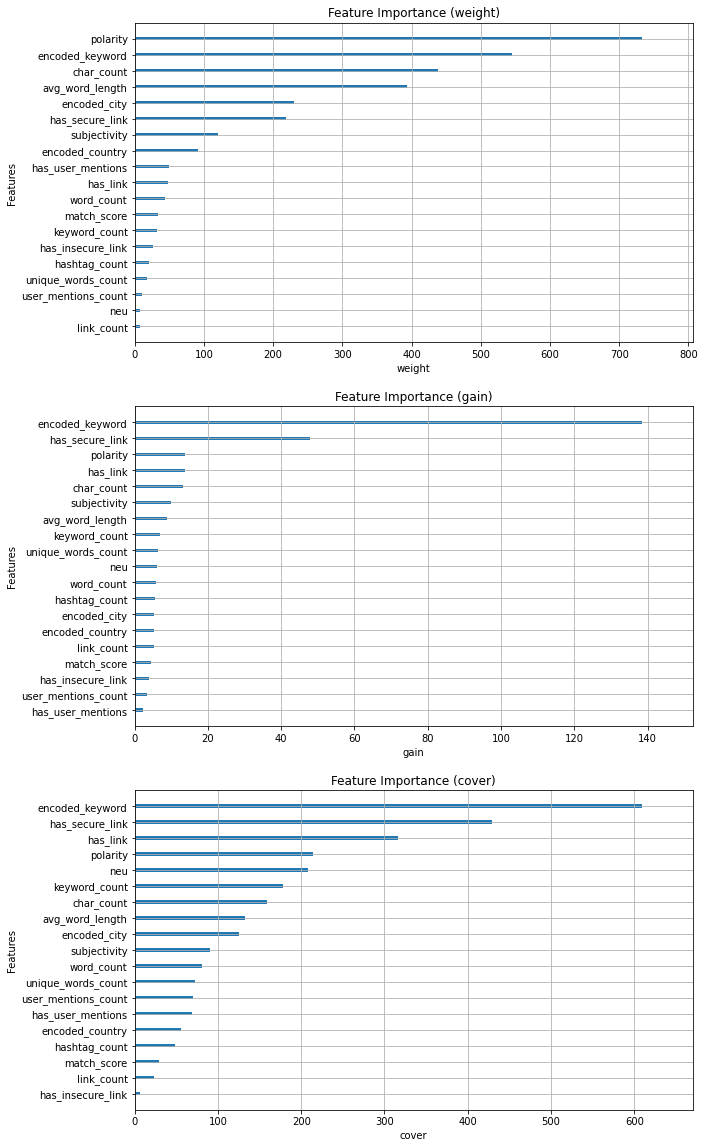

In [14]:
catboost_classifier = CatBoostClassifier(
    class_weights=[1, 1.2],
    logging_level='Silent',
    thread_count=8,
    depth=5,
    n_estimators=100,
    learning_rate=0.01
)

catboost_classifier = try_classifier(catboost_classifier)

# Prepare predictions

In [15]:
test = full_model[full_model['target'].isnull()]
test = test.drop('target', axis=1)

In [16]:
predictions = xgb_classifier.predict(test).astype(int)

In [17]:
result = pd.DataFrame(data={'id': test.index, 'target': predictions})

In [18]:
now = datetime.now(tz=None).strftime('%Y-%m-%dT%H-%M-%S')
result.to_csv(f'../predictions/prediction_{now}.csv', encoding='utf-8', index=False)